In [64]:
import warnings
import numpy as np
import pandas as pd
import sklearn.metrics as metrics
from dataset import suny_international
import tensorflow as tf

In [54]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('figure', figsize=(10, 5))

In [55]:
warnings.filterwarnings("ignore")
tf.get_logger().setLevel('ERROR')

In [56]:
df=suny_international.load_data()['GHI']

In [57]:
import statsmodels.api as sm
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

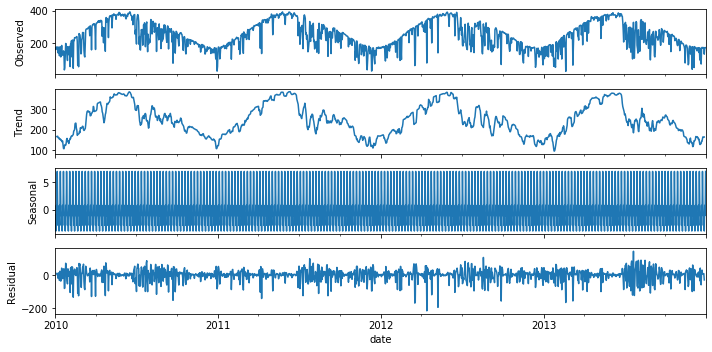

In [58]:
y = df.resample('D').mean()
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

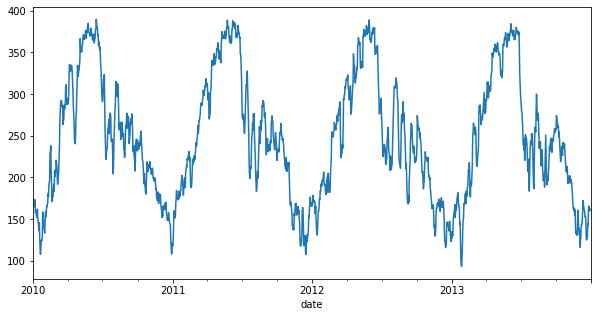

In [132]:
seasonal_trend=(decomposition.seasonal+decomposition.trend)
seasonal_trend.plot()

In [141]:
seasonal_trend_avg=pd.DataFrame({year:pd.Series(np.array(seasonal_trend[str(year)]),index=seasonal_trend[str(year)].index.strftime("%m-%d")) for year in range(2010,2014)})

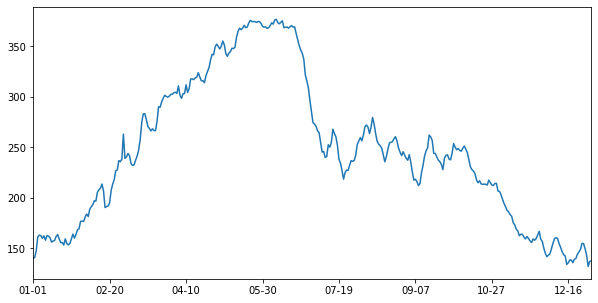

In [144]:
seasonal_trend_avg.mean(axis=1).plot()

In [139]:
pd.Series(np.array(seasonal_trend[str(year)]),index=seasonal_trend[str(year)].index.strftime("%m-%d"))

01-01           NaN
01-02           NaN
01-03           NaN
01-04    165.130498
01-05    173.430349
            ...    
12-27    123.559069
12-28    115.046420
12-29    108.031253
12-30    108.873758
12-31    121.177430
Length: 365, dtype: float64

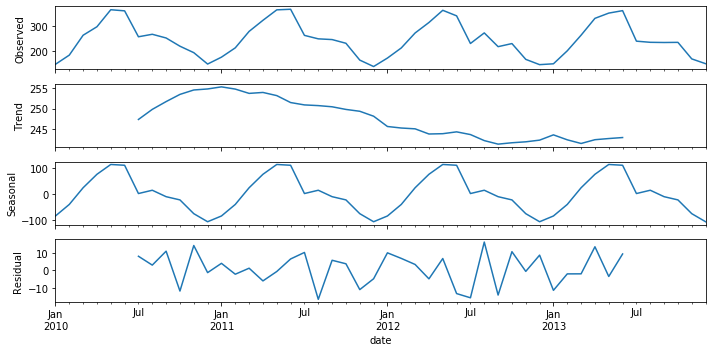

In [26]:
y = df.resample('MS').mean()
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [48]:
fit1 = Holt(np.asarray(df_train.resample('MS').mean())).fit()
y_pred= fit1.forecast(len(df_test.resample('MS').mean()))

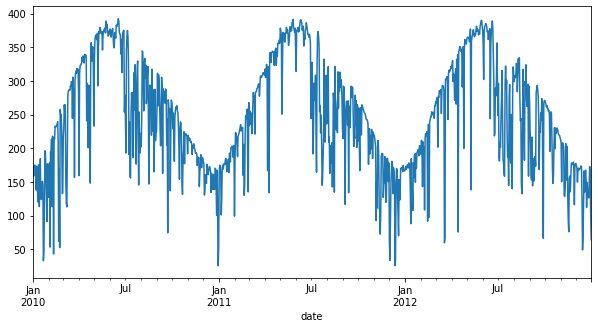

In [51]:
df_train.resample('D').mean().plot()

ValueError: x and y must have same first dimension, but have shapes (12,) and (365,)

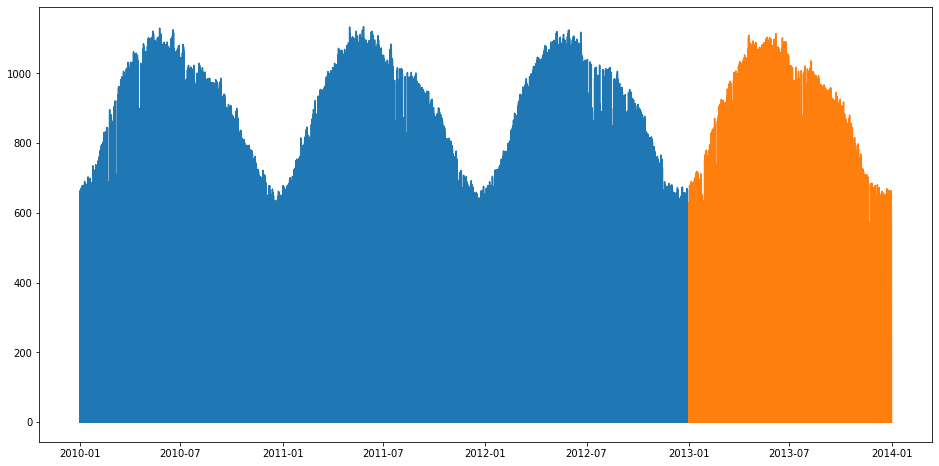

In [44]:
fit1 = Holt(np.asarray(df_train)).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg= fit1.forecast(len(df_test))

plt.figure(figsize=(16,8))
plt.plot(df_train, label='Train')
plt.plot(df_test, label='Test')
plt.plot(df_t,y_hat_avg, label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [46]:
y_pred

array([113.25976739, 113.25976739, 113.25976739, 113.25976739,
       113.25976739, 113.25976739, 113.25976739, 113.25976739,
       113.25976739, 113.25976739, 113.25976739, 113.25976739,
       113.25976739, 113.25976739, 113.25976739, 113.25976739,
       113.25976739, 113.25976739, 113.25976739, 113.25976739,
       113.25976739, 113.25976739, 113.25976739, 113.25976739,
       113.25976739, 113.25976739, 113.25976739, 113.25976739,
       113.25976739, 113.25976739, 113.25976739, 113.25976739,
       113.25976739, 113.25976739, 113.25976739, 113.25976739,
       113.25976739, 113.25976739, 113.25976739, 113.25976739,
       113.25976739, 113.25976739, 113.25976739, 113.25976739,
       113.25976739, 113.25976739, 113.25976739, 113.25976739,
       113.25976739, 113.25976739, 113.25976739, 113.25976739,
       113.25976739, 113.25976739, 113.25976739, 113.25976739,
       113.25976739, 113.25976739, 113.25976739, 113.25976739,
       113.25976739, 113.25976739, 113.25976739, 113.25